#### applying k-means cluster on 100 annotated images of faces to find out the top 4 anchor boxes

In [0]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.cluster import KMeans

In [29]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [30]:
path = '/gdrive/My Drive/Colab Notebooks/eva/assignment-16/'
!ls '/gdrive/My Drive/Colab Notebooks/eva/assignment-16/'

assignment_16.ipynb  via_export_json.json


In [0]:
# loading the json file having the information about the anchor boxes
with open(path + "via_export_json.json") as f:
  annotations = json.load(f)


In [32]:
annotations

{'img_001.jpeg12257': {'file_attributes': {'caption': '',
   'image_url': '',
   'public_domain': 'no'},
  'filename': 'img_001.jpeg',
  'regions': [{'region_attributes': {'class': 'right',
     'image_quality': {'frontal': True,
      'good': True,
      'good_illumination': True},
     'name': 'not_defined',
     'type': 'human'},
    'shape_attributes': {'height': 232,
     'name': 'rect',
     'width': 200,
     'x': 153,
     'y': 20}}],
  'size': 12257},
 'img_002.jpeg13092': {'file_attributes': {'caption': '',
   'image_url': '',
   'public_domain': 'no'},
  'filename': 'img_002.jpeg',
  'regions': [{'region_attributes': {'class': 'downleft',
     'image_quality': {'frontal': True,
      'good': True,
      'good_illumination': True},
     'name': 'not_defined',
     'type': 'unknown'},
    'shape_attributes': {'height': 214,
     'name': 'rect',
     'width': 171,
     'x': 161,
     'y': 22}}],
  'size': 13092},
 'img_003.jpeg11543': {'file_attributes': {'caption': '',
   'ima

In [0]:
shapes = []

In [0]:
# going through each of the boxes and appending their height and width
for key in annotations.keys():
  annotation = annotations[key]
  regions = annotation['regions']
  for region in regions:
    height = region['shape_attributes']['height']
    width = region['shape_attributes']['width']
    shapes.append([height, width])

In [44]:
shapes = np.array(shapes)
shapes.shape

(245, 2)

In [0]:
# as we have resized all the images to the dimension of 400x400, we can normalize the height and width values just by dividing them by 400 
shapes = shapes/400

In [0]:
# converting the heights and widths to logarithmic scales
shapes = np.log(shapes)

#### Now we will be using k-means to find the centroid of the clusters

In [51]:
shapes[:0].shape

(0, 2)

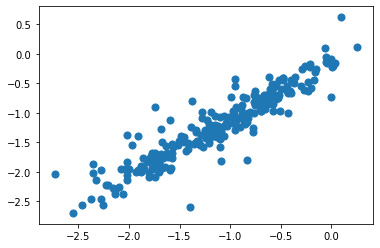

In [53]:
# before that let's first visualize the data how it is scattered
plt.scatter(shapes[:,0], shapes[:,1], s= 50)

In [0]:
# as we have to find top 4 anchor boxes we will used 4 clusters for k-means
kmeans = KMeans(n_clusters=4, random_state=0).fit(shapes)

In [0]:
# the cluster centers are
centers = kmeans.cluster_centers_

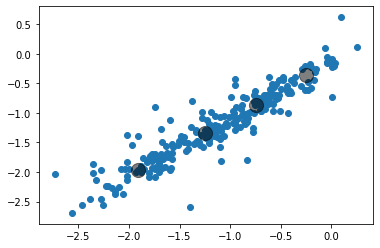

In [56]:
# now let's put the centers in the scatter plot to see where do they sit
plt.scatter(shapes[:,0], shapes[:,1])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [58]:
# now converting the cluster centers to orginal form without log change and normalization
centers = np.exp(centers) * 400
centers

array([[190.30055387, 166.7948132 ],
       [ 59.03954142,  55.75857252],
       [114.71623694, 104.82422925],
       [311.1077676 , 281.20294509]])